# Matplotlib Visualization Techniques Tutorial

This notebook demonstrates various visualization techniques in Matplotlib, including:
- Figure and Axes Adjustments
- Text Alignment and Parameters
- Colormaps
- Legend Placement
- Annotation Styles
- Common Operations
- Performance Tips

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Set style for better looking plots
#plt.style.use('seaborn')

## 1. Figure and Axes Adjustments

The `subplots_adjust()` function allows you to control the spacing between and around subplots. Parameters include:
- `left`: Left side of the subplots
- `right`: Right side of the subplots
- `bottom`: Bottom of the subplots
- `top`: Top of the subplots
- `wspace`: Width spacing between subplots
- `hspace`: Height spacing between subplots

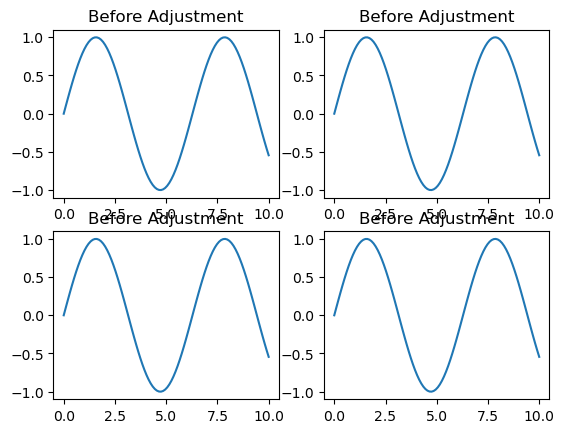

In [3]:
# Create example plots with default spacing
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

x = np.linspace(0, 10, 100)
for ax in [ax1, ax2, ax3, ax4]:
    ax.plot(x, np.sin(x))
    ax.set_title('Before Adjustment')

plt.show()

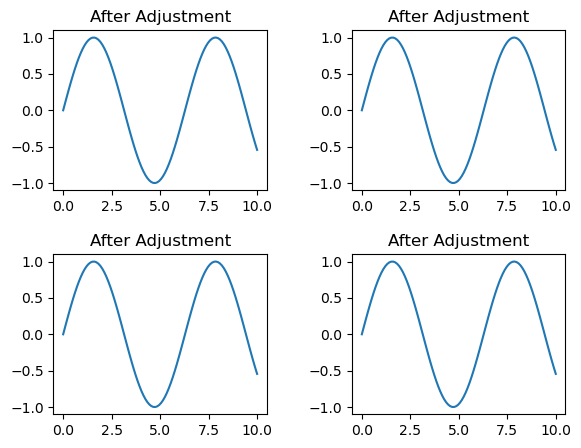

In [4]:
# Same plots with adjusted spacing
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

for ax in [ax1, ax2, ax3, ax4]:
    ax.plot(x, np.sin(x))
    ax.set_title('After Adjustment')

plt.subplots_adjust(
    left=0.1,    # Left side of the subplots
    right=0.9,   # Right side of the subplots
    bottom=0.1,  # Bottom of the subplots
    top=0.9,     # Top of the subplots
    wspace=0.4,  # Width spacing between subplots
    hspace=0.4   # Height spacing between subplots
)

plt.show()

## 2. Text Alignment and Parameters

Text in Matplotlib can be customized with various alignments and parameters:
- Horizontal alignment: 'left', 'center', 'right'
- Vertical alignment: 'top', 'center', 'bottom'
- Font properties: family, size, weight, style

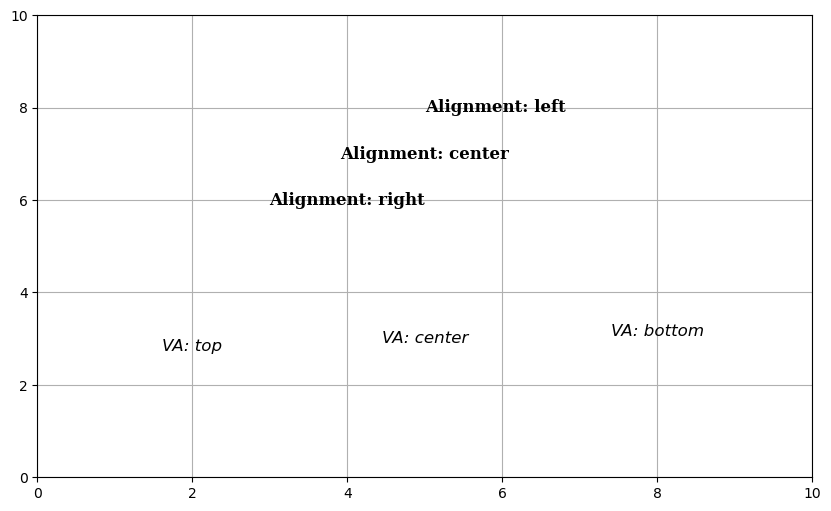

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

# Horizontal alignments
alignments = ['left', 'center', 'right']
y_positions = [8, 7, 6]

for alignment, y in zip(alignments, y_positions):
    ax.text(5, y, f'Alignment: {alignment}',
            ha=alignment,
            va='center',
            fontsize=12,
            family='serif',
            weight='bold')

# Vertical alignments
verticals = ['top', 'center', 'bottom']
x_positions = [2, 5, 8]

for vertical, x in zip(verticals, x_positions):
    ax.text(x, 3, f'VA: {vertical}',
            ha='center',
            va=vertical,
            fontsize=12,
            family='sans-serif',
            style='italic')

ax.grid(True)
plt.show()

## 3. Colormaps

Matplotlib provides several types of colormaps:
- Uniform: sequential colormaps like 'viridis'
- Diverging: emphasize critical values like 'RdYlBu'
- Qualitative: distinguish discrete categories like 'Set3'
- Miscellaneous: special purpose maps like 'terrain'

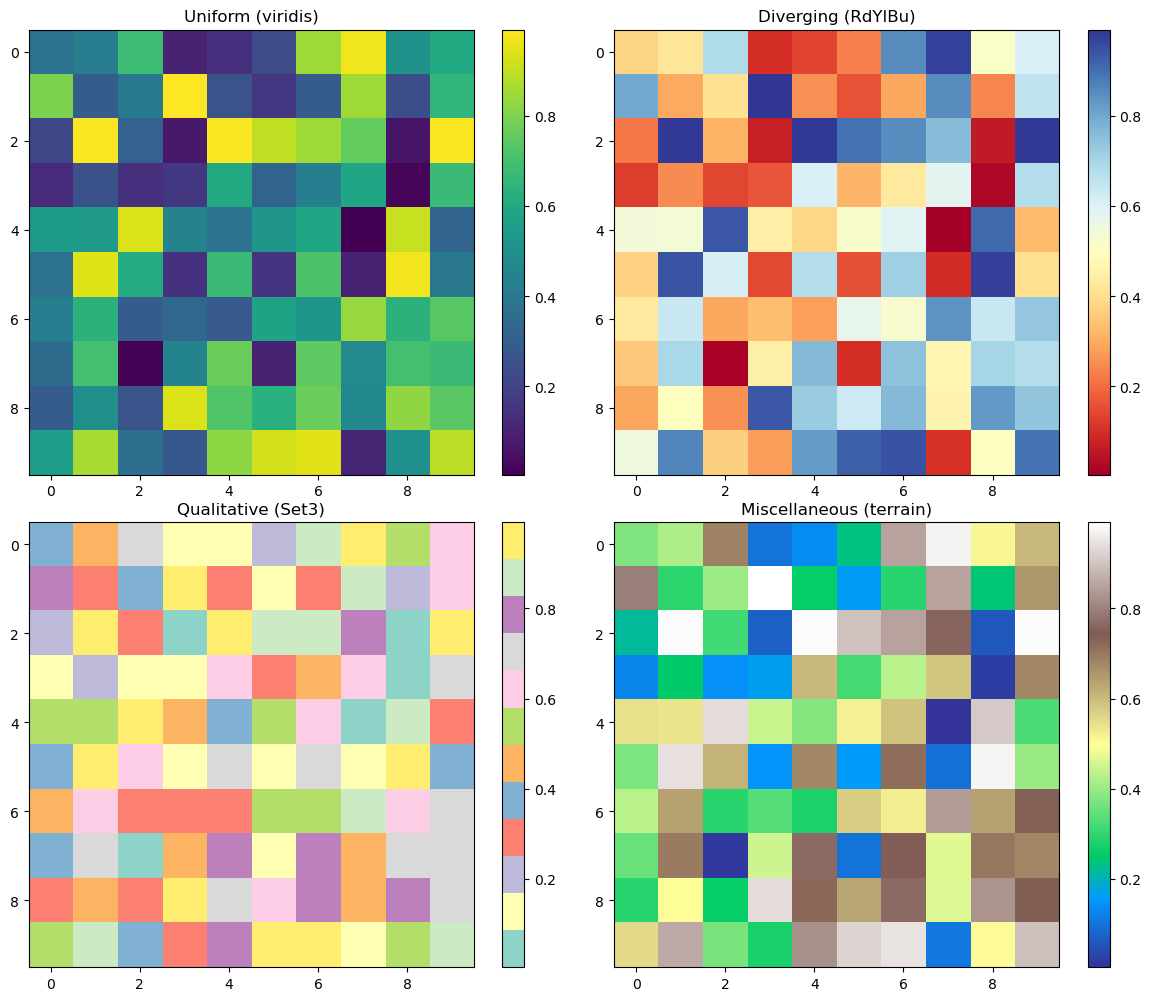

In [6]:
data = np.random.rand(10, 10)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

# Uniform colormap
im1 = ax1.imshow(data, cmap='viridis')
ax1.set_title('Uniform (viridis)')
plt.colorbar(im1, ax=ax1)

# Diverging colormap
im2 = ax2.imshow(data, cmap='RdYlBu')
ax2.set_title('Diverging (RdYlBu)')
plt.colorbar(im2, ax=ax2)

# Qualitative colormap
im3 = ax3.imshow(data, cmap='Set3')
ax3.set_title('Qualitative (Set3)')
plt.colorbar(im3, ax=ax3)

# Miscellaneous colormap
im4 = ax4.imshow(data, cmap='terrain')
ax4.set_title('Miscellaneous (terrain)')
plt.colorbar(im4, ax=ax4)

plt.tight_layout()
plt.show()

## 4. Legend Placement

Matplotlib offers various predefined legend locations and custom positioning options.

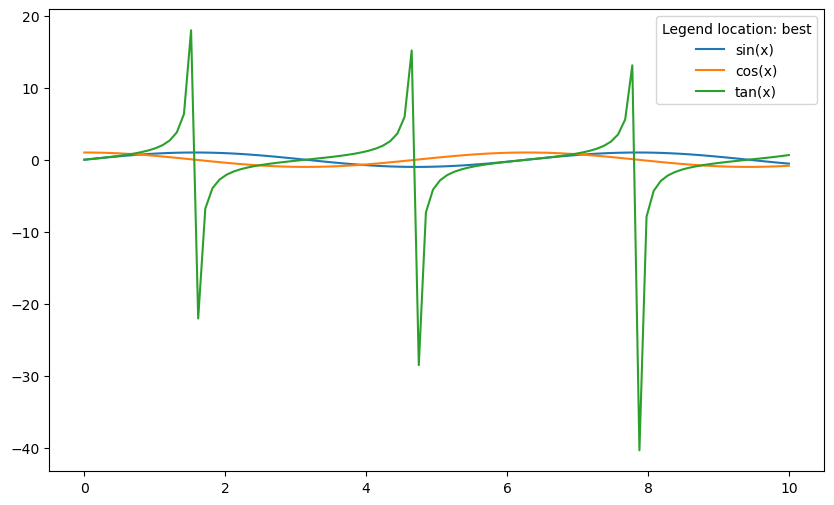

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
x = np.linspace(0, 10, 100)

# Create multiple lines
ax.plot(x, np.sin(x), label='sin(x)')
ax.plot(x, np.cos(x), label='cos(x)')
ax.plot(x, np.tan(x), label='tan(x)')

# Try different legend locations
locations = ['best', 'upper right', 'upper left', 'lower left', 
            'lower right', 'right', 'center left', 'center right',
            'lower center', 'upper center', 'center']

# We'll show the first location as an example
ax.legend(loc='best', title='Legend location: best')
plt.show()

## 5. Annotation Styles

Annotations can be customized with different connection styles and arrow properties.

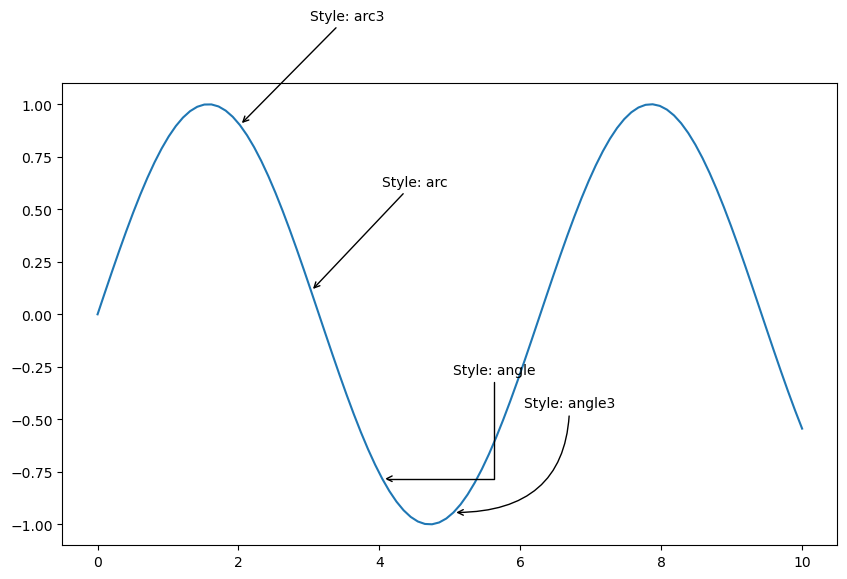

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
x = np.linspace(0, 10, 100)
y = np.sin(x)
ax.plot(x, y)

# Different connection styles
styles = ['arc3', 'arc', 'angle', 'angle3']

for i, style in enumerate(styles):
    ax.annotate(f'Style: {style}',
                xy=(x[20+i*10], y[20+i*10]),
                xytext=(x[20+i*10]+1, y[20+i*10]+0.5),
                arrowprops=dict(
                    arrowstyle='->',
                    connectionstyle=style),
                )

plt.show()

## 6. Common Operations

Here are some frequently used Matplotlib operations:

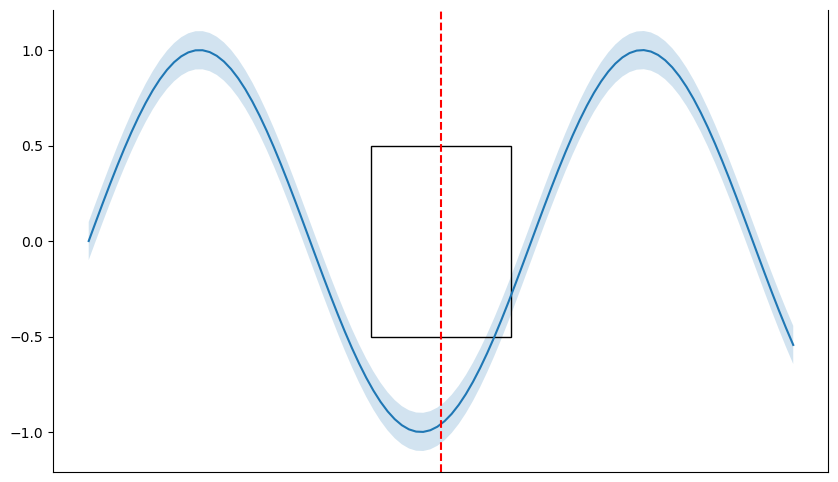

In [9]:
# Create a figure
fig, ax = plt.subplots(figsize=(8, 6))

# Basic plot
x = np.linspace(0, 10, 100)
y = np.sin(x)
ax.plot(x, y)

# Resize figure
fig.set_size_inches(10, 6)

# Remove ticks
ax.set_xticks([])

# Rotate tick labels
ax.tick_params(axis='x', rotation=45)

# Hide top spine
ax.spines['top'].set_visible(False)

# Add shaded error region
error = 0.1 * np.ones_like(y)
ax.fill_between(x, y-error, y+error, alpha=0.2)

# Add vertical line
ax.axvline(x=5, color='red', linestyle='--')

# Add rectangle
rect = plt.Rectangle((4, -0.5), 2, 1, fill=False)
ax.add_patch(rect)

plt.show()

## 7. Performance Tips

Here are some examples of efficient vs. inefficient plotting methods:

Slow way took: 0.37 seconds
Fast way took: 0.00 seconds


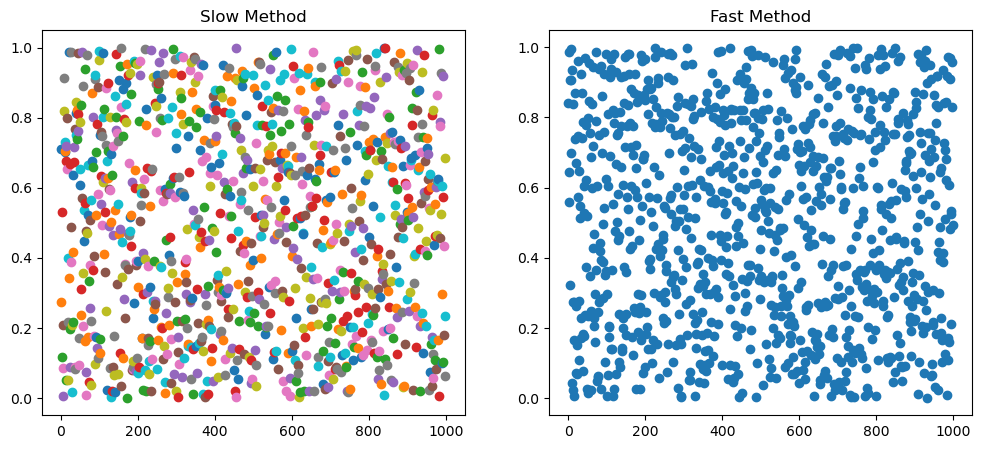

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Slow way
t0 = time.time()
for i in range(1000):
    ax1.plot(i, np.random.random(), 'o')
print(f"Slow way took: {time.time() - t0:.2f} seconds")

# Fast way
t0 = time.time()
x = np.arange(1000)
y = np.random.random(1000)
ax2.plot(x, y, 'o')
print(f"Fast way took: {time.time() - t0:.2f} seconds")

ax1.set_title('Slow Method')
ax2.set_title('Fast Method')
plt.show()

## Additional Performance Tips

Here are some additional performance tips for working with Matplotlib:

1. Use `plot()` with markers instead of `scatter()` for better performance
2. Avoid unnecessary canvas redraws
3. Use `set_data()` for updating plots instead of clearing and redrawing
4. Batch your plot commands when possible
5. Consider using `blitting` for animations

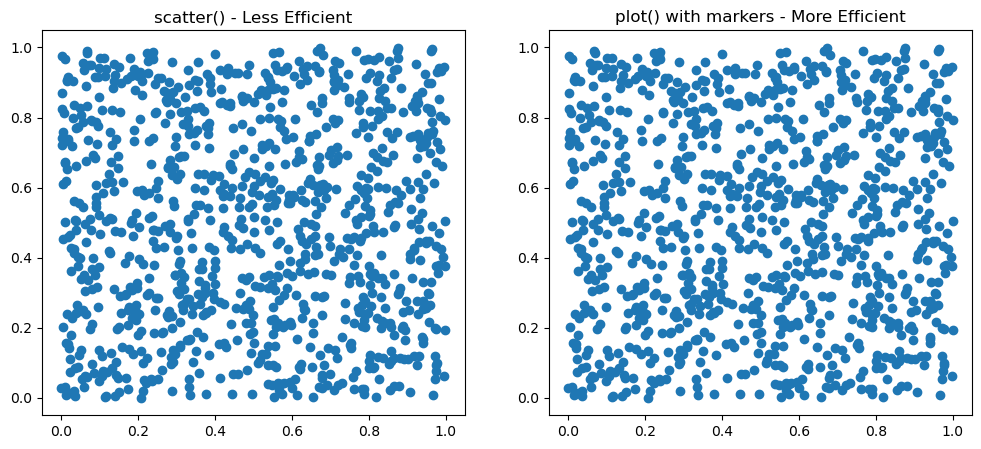

In [11]:
# Example of efficient vs inefficient scatter plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Less efficient scatter
x = np.random.rand(1000)
y = np.random.rand(1000)
ax1.scatter(x, y)
ax1.set_title('scatter() - Less Efficient')

# More efficient plot with markers
ax2.plot(x, y, 'o')
ax2.set_title('plot() with markers - More Efficient')

plt.show()

## Conclusion

In this tutorial, we've covered:
- Figure and axes adjustments using `subplots_adjust()`
- Text alignment and parameter customization
- Different types of colormaps and their uses
- Legend placement options
- Annotation styles and customization
- Common Matplotlib operations
- Performance tips and best practices

For more information, refer to the [Matplotlib documentation](https://matplotlib.org/stable/contents.html) and the [Matplotlib gallery](https://matplotlib.org/stable/gallery/index.html).

In [12]:
# Display available styles as a final note
print("Available Matplotlib styles:")
print(plt.style.available)

Available Matplotlib styles:
['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
